## Excercise 9.5, Page 431 {-}

In this script, we solve the wave equation for a piano string using the Forward-Time Centered-Space $FTCS$ method. The piano string, of length $L = 1 \left[m\right]$, is initially at rest and then struck by a hammer at a distance $d = 0.1 \left[m\right]$ from one end. The initial velocity profile of the string is given by:



$\psi_{x} = C \frac{x(L - x)}{L^2} \exp \left[ -\frac{(x - d^2)}{2\sigma^2} \right]$



where $C = 1 \left[ \frac{m}{s} \right]$ is the amplitude, $\sigma = 0.3 \left[m\right]$ is the width of the profile, and $v = 100 \left[ \frac{m}{s} \right]$ is the wave speed.

We discretize the string into $N = 500$ grid points with spacing $a = \frac{L}{N}$. The time step is set to $h = 1 \times 10^{-6} \left[s\right]$.

The script uses the FTCS method to iteratively update the displacement and velocity of the string. The displacement of the string is animated over time using Matplotlib's `FuncAnimation` to visualize the motion of the string.



<IPython.core.display.Javascript object>


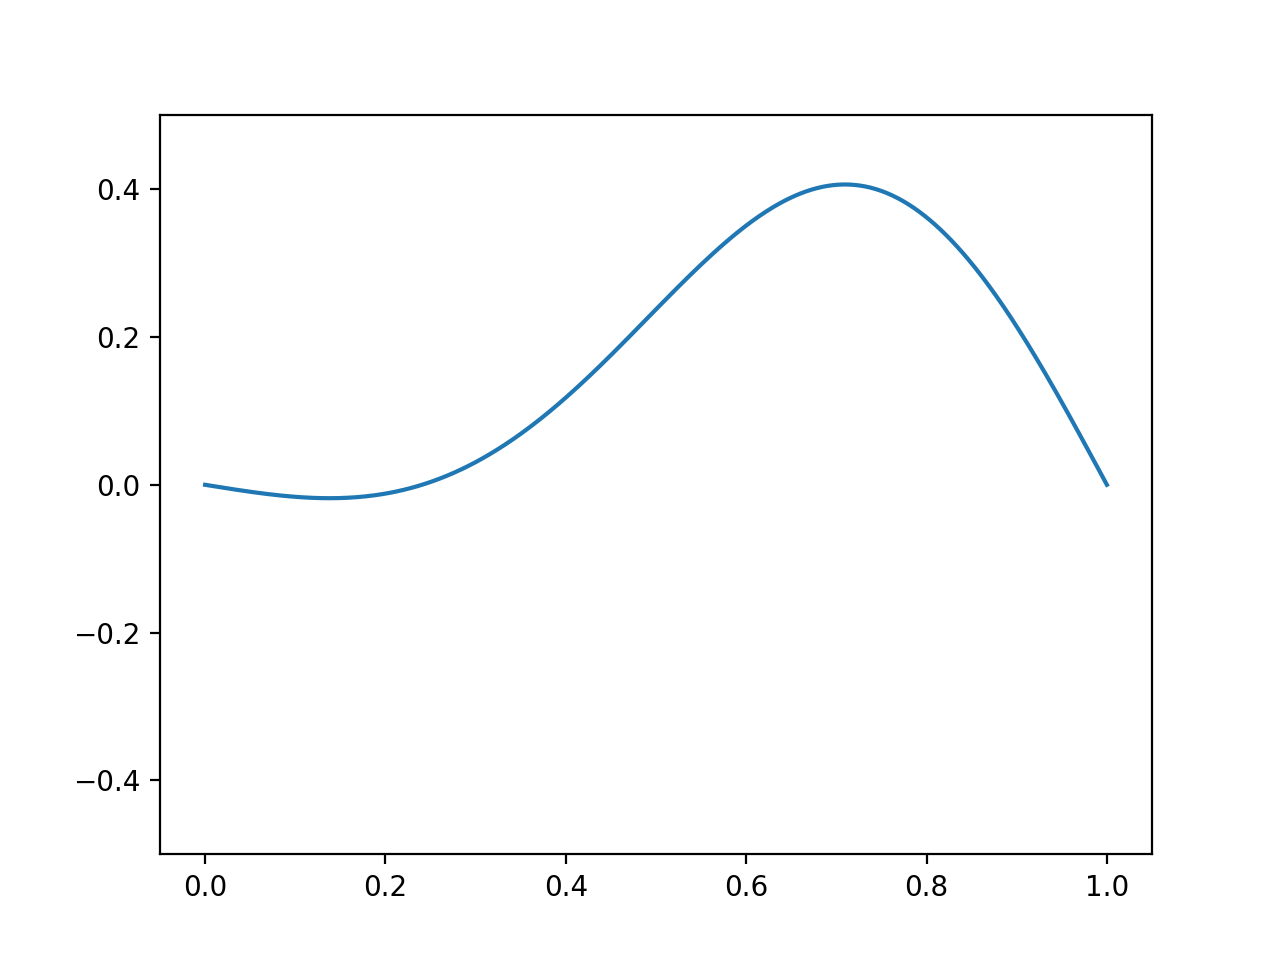

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constants
h = 1e-6  # Time step
L = 1.0  # Length of the string in meters
v = 100.0  # Wave speed in m/s
d = 0.1  # Distance from the end where the string is struck
C = 1.0  # Amplitude of the initial velocity profile
sigma = 0.3  # Width of the initial velocity profile
N = 500  # Number of grid points
a = L / N  # Spacing between grid points

# Initial velocity profile function
def phi0(x):
    """
    Calculate the initial velocity profile of the string.
    """
    return C * x * (L - x) / L**2 * np.exp(- (x - d)**2 / (2 * sigma**2))

# Arrays to hold the displacement and velocity
fi = np.zeros(N+1, float)
x = np.linspace(0, L, N+1)
phi = phi0(x)

# Function to iterate the FTCS method
def iterate(fi, phi, dt=50e-3):
    """
    Perform iterations using the FTCS method to update displacement and velocity.
    """
    iterations = int(dt / h)
    for i in range(iterations):
        fi[1:N] += h * phi[1:N]
        phi[1:N] += h * v**2 / a**2 * (fi[2:N+1] + fi[0:N-1] - 2 * fi[1:N])
    return fi, phi

# Set up the plot
fig, ax = plt.subplots()
line, = ax.plot(x, fi * 2e3)
ax.set_ylim(-0.5, 0.5)  # Set the y-axis limits

# Animation update function
def update(frame):
    """
    Update the plot for each frame of the animation.
    """
    global fi, phi
    fi, phi = iterate(fi, phi, dt=50e-3/100)
    line.set_ydata(fi * 2e3)
    return line,

# Animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 200), blit=True, interval=50)

plt.show()
